In [5]:
import warnings
warnings.filterwarnings("ignore")
# loading packages
# 1 basic
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

## 导入数据函数：

In [6]:
def DuanLi_open_file(file_name):
    if file_name.endswith('.csv'):
        data = pd.read_csv(file_name)
    elif file_name.endswith('.xlsx') or file_name.endswith('.xls'):
        data = pd.read_excel(file_name)
    elif file_name.endswith('.json'):
        data = pd.read_json(file_name)
    elif file_name.endswith('.pkl'):
        data = pd.read_pickle(file_name)
    else:
        raise ValueError("Unsupported file format. Please provide a file with .csv, .xlsx, .xls, or .json extension.")
    return data

In [7]:
train_data=DuanLi_open_file("ds_salaries.csv")


## 初步查看数据

In [8]:
# 传入数据，和数据的名字，得到数据的前五行数据，和info
def DuanLi_check_file(data,data_name):
    print('{:*^30}'.format('{} first 5 rows').format(data_name))
    print(data.head(5))
    print('{:*^30}'.format('{} info of each column').format(data_name))
    print(data.info(),'\n','\n')

In [9]:
DuanLi_check_file(train_data,'train_data')

*******train_data first 5 rows********
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0            

## one-hot编码，就是转化为0，1格式

### 第一种：对数据某一列进行0-1化，要求这列的每一行都只有单个的值

In [10]:
# 传入数据集dataframe，和需要编码吗的列名称【列1，列2····】，返回0 1 编码，按照每一列的数据，
# 内部逻辑就是对每一列进行0 1 编码,比如：传入的一列全是数字，最大值是7，那么编码结果就是生成0~7列，原来是3的就在第三列显示1，原来是5的就在第5列显示1
def DuanLi_convert_to_twovalues(data,columns):
    connect_column=[]
    for item in columns:
        df_tem=pd.get_dummies(data[item],prefix=item)
        connect_column.append(df_tem)
    data_new=pd.concat(connect_column,axis=1)
    return data_new

### 第二种：对数据某一列进行0-1化，要求这列的每一行都有多个值，且用‘，’隔开的，如果是用其他隔开的，需要修改函数内部join（）和get_dummies()

In [11]:
# 传入dataframe数据集，和需要0 1 化的列名称，每一列需要是一个str的list格式比如【】
def DuanLi_one_hot(data,columns):
    connect_column=[]
    for item in columns:
        temp=data[item].str.join(',')
        df_tem=temp.str.get_dummies(',')
        connect_column.append(df_tem)
    data_new=pd.concat(connect_column,axis=1)
    return data_new

##### 第二种举例：

In [12]:
retail_1=pd.DataFrame({'id':[1,2,3],'basket':[['b','d','p','c','a'],
                                ['b','f','p'],
                                ['m','q','p','e','a'] ]
         })

In [13]:
a=DuanLi_one_hot(retail_1,['basket'])
a

,a,b,c,d,e,f,m,p,q
0,1,1,1,1,0,0,0,1,0
1,0,1,0,0,0,1,0,1,0
2,1,0,0,0,1,0,1,1,1


## 关联规则分析
###  需要传入的是经过one_hot处理过的数据，会自动分析打印这些项的关联规则分析结果

###### 分析指标含义：
###### {A} -> {B}，提升度 =2.这表示当 A 出现时，B 的出现概率是 A 不出现时的 2 倍。
###### {A} -> {B}，置信度 = 0.6.这表示当 A 出现时，B 同时出现的概率为 0.6 或 60%。
###### {A} -> {B}，确信度的取值范围为 [0, +∞].确信度为0表示前项和后项之间没有关联性，确信度越接近+∞，表示后项的依赖程度越强，。

In [15]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
def Duan_Li_association_rule(data):
    frequent_itemsets = apriori(data, min_support=0.5, use_colnames=True)
    for item in [["lift",1.1],["confidence",0.7]]:
        rules = association_rules(frequent_itemsets, metric=item[0], min_threshold=item[1])
        print('{:*^30}'.format('{} ordering').format(item[0]))
        n=len(rules)
        for i in range(n):
            print(f"{i} item in {n} ")
            A=rules.iloc[i]["antecedents"]
            B=rules.iloc[i]["consequents"]
            C=rules.iloc[i]["lift"]
            D=rules.iloc[i]["confidence"]
            E=rules.iloc[i]["conviction"]
            print(f"lift = {C} ,  When {A} occurs, {B} is {C} times more likely to be present than when {A} is absent ")
            print(f"confidence ={D},  When {A} occurs, the probability that {B} also occurs is {D} ")
            print(f"conviction = {E}")
            if rules.iloc[i]["conviction"]== 'inf':
                print(f"The occurrence of the {B} depends almost entirely on {A}")
            if rules.iloc[i]["conviction"]== 0:
                print(f"The occurrence of the {B}  has nothing to do with {A}")


In [106]:
Duan_Li_association_rule(a)

*********lift ordering**********
*********confidence ordering**********
0 item in 2 
lift = 1.0 ,  When frozenset({'a'}) occurs, frozenset({'p'}) is 1.0 times more likely to be present than when frozenset({'a'}) is absent 
confidence =1.0,  When frozenset({'a'}) occurs, the probability that frozenset({'p'}) also occurs is 1.0 
conviction = inf
1 item in 2 
lift = 1.0 ,  When frozenset({'b'}) occurs, frozenset({'p'}) is 1.0 times more likely to be present than when frozenset({'b'}) is absent 
confidence =1.0,  When frozenset({'b'}) occurs, the probability that frozenset({'p'}) also occurs is 1.0 
conviction = inf


## 把非标准的日期格式转换为标准的日期格式（年-月-日 时：分：秒）
### 同时提取其中的月和星期几新加到数据列中，根据需求修改

In [16]:
# data:dataframe 的数据集；  target：需要处理的列名称，可以是1列，也可以是多列
def Duan_ListandlizeDate(data,target):
    for item in target:
        data[item]=pd.to_datetime(data[item],errors='coerce')
        data['Month']=data[item].dt.strftime('%b')
        data['Weekday'] = data[item].dt.strftime('%a')
        data['Hour'] = data[item].dt.strftime('%H')  #提取小时
    return data

In [156]:
# 使用案例
df = pd.DataFrame({
    'Date': ['2023.5.15', 'May.15.2023', '03-25-2023', '04-10-2023'],
    'Date1': ['2023.5.15', 'May.15.2023', '09:15:30', '04-10-2023'],
    'Value': [10, 20, 30, 40]
})
df
a=['Date','Date1']
df = Duan_ListandlizeDate(df,a)
df

,Date,Date1,Value,Month,Weekday,Hour
0,2023-05-15,2023-05-15 00:00:00,10,May,Mon,00
1,2023-05-15,2023-05-15 00:00:00,20,May,Mon,00
2,2023-03-25,2023-06-08 09:15:30,30,Jun,Thu,09
3,2023-04-10,2023-04-10 00:00:00,40,Apr,Mon,00


In [159]:
print(len(df['Value']))

4


## 去掉数字数据中其他内容，保留小数点
#### 传入dataframe数据集和需要处理的列名称

In [17]:
import re
def Duan_Li_cleaning_digit_data(data,target):
    for item in target:
        data[item]=data[item].apply(lambda x: re.sub(r'[^0-9.]', '', x))
        data[item].astype(float)
    return data

In [18]:
# 使用案例
df = pd.DataFrame({
    'Text': ['abc12.3def', 'xyz4,56.5pqr', 'mno789.0stu'],
    'Text1': ['abc12.3def', 'xyz4,56.5pqr', 'mno789.0stu']
})
a=['Text','Text1']
df=Duan_Li_cleaning_digit_data(df,a)
print(df)

    Text  Text1
0   12.3   12.3
1  456.5  456.5
2  789.0  789.0


## 柱状图和折线图结合的可视化
#### 传入dataframe数据集，列名称A,列名称B，画出B随A变化的柱状图和折线图的组合，且表明了最高点和最低点


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 传入数据集，列名称A,列名称B，画出B随A变化的柱状图和折线图的组合，且表明了最高点和最低点
def Duan_Li_visualize_BarPoint(data,A,B):
    fig, ax = plt.subplots(figsize=(13, 7))
    data1=data.groupby(A)[B].mean().reset_index().sort_values(by=A)
    data1=data1.sort_values(by=A, key=lambda x: pd.Categorical(x, categories=data1[A].unique(), ordered=True))

    sns.barplot(data=data1, x=A, y=B, ax=ax)
    sns.pointplot(data=data1, x=A, y=B, marker='o', ax=ax)
    # 标注极值点
    max_value = data1[B].max()
    q1=data1[data1[B]==max_value].index.item()
    min_value = data1[B].min()
    q2=data1[data1[B]==min_value].index.item()
    ax.annotate(f'Max: {max_value}', fontsize=15,color='purple',xy=(q1, max_value), xytext=(10, 10),
                textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=2.5))
    ax.annotate(f'Min: {min_value}', fontsize=15, color='red', xy=(q2, min_value), xytext=(10, -20),
                textcoords='offset points', arrowprops=dict(arrowstyle='->', lw=2.5))
    ax.set_title(f'The relationship between {B} and {A }(the trend of {B} changing with {A})')
    ax.set_xlabel(A)
    ax.set_ylabel(B)

    plt.show()

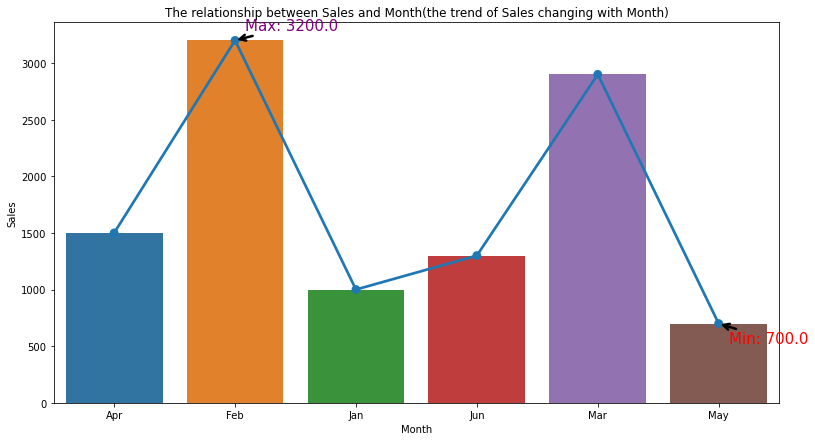

  Month   Sales
0   Apr  1500.0
1   Feb  3200.0
2   Jan  1000.0
3   Jun  1300.0
4   Mar  2900.0
5   May   700.0


In [21]:
# 使用案例
df = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jun','May'],
    'Sales': [1000, 3200, 2900, 1500, 1100, 2000,600,300]
})
# df['Month']=pd.to_datetime(df['Month'],errors='coerce')
Duan_Li_visualize_BarPoint(df,'Month','Sales')
da=df.groupby(df['Month'])['Sales'].mean().reset_index()
print(da)

## 饼图的绘制，对某一列里面的不同值在整体的占比进行分析
#### dataframe：直接传入dataframe的数据，column：需要绘制饼图的列名称，highlight：选择max，则突出显示占比最大的，选择min则突出显示占比最小的。如果有多个值，默认选择第一个.  注意，本图最多画出占比前十的数据

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def Duan_Li_plot_pie_chart(dataframe, column, highlight=None):
    # 统计每个类别的数量
    counts = dataframe[column].value_counts()
    counts=counts.head(10)
    # 获取类别标签和数量
    labels = counts.index.tolist()
    values = counts.values.tolist()
    maxvalue=counts.values.max()
    minvalue=counts.values.min()
    maxlable=counts[counts.values==maxvalue].index.tolist()
    minlable=counts[counts.values==minvalue].index.tolist()
    # 随机选择颜色
    colors = sns.color_palette(n_colors=len(labels))
    # 设置突出显示的部分
    if highlight=='max':
        explode = [0.1 if i == maxlable[0] else 0 for i in labels]
    if highlight=='min':
        explode = [0.1 if i == minlable[0] else 0 for i in labels]
    # 绘制饼图
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
    # 添加注释
    for i, autotext in enumerate(autotexts):
        if i == labels.index(maxlable[0]) and highlight=='max':
            autotext.set_color('white')  # 突出显示部分的注释文字颜色为白色
            autotext.set_fontweight('bold')  # 突出显示部分的注释文字加粗
            autotext.set_fontsize(17)  # 突出显示部分的注释文字加粗
        if i == labels.index(minlable[0]) and highlight=='min':
            autotext.set_color('white')  # 突出显示部分的注释文字颜色为白色
            autotext.set_fontweight('bold')  # 突出显示部分的注释文字加粗
            autotext.set_fontsize(17)  # 突出显示部分的注释文字加粗
    # 添加图表标题和图例
    plt.title(f'Pie Chart of {column}')
    plt.legend(loc='best')
    # 设置坐标轴为相等的圆形
    plt.axis('equal')
    # 显示图表
    plt.show()


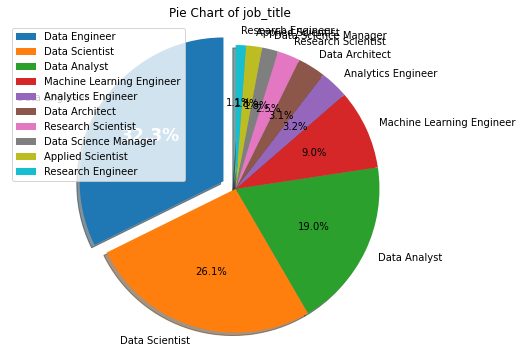

In [23]:
# 使用案例
data = {
    'day_of_week': [1,2,3,4,5,6,7,8,9,6,5,4,7]
    
}
df = pd.DataFrame(data)

Duan_Li_plot_pie_chart(train_data, 'job_title', "max")


## 小提琴图的绘制，用于分析某一列数据的分布情况
#### 传入dataframe 格式的data，画的是，y_variable 按x_variable分组过后，每个组的分布情况，如果填了‘hu’这个参数，就是画y_variable 按x_variable分组过后再按‘hu’分组后的分布情况对比，但是‘hu’如果超过两个以上的分类就不是很好了

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def LD_plot_violin(data, x_variable, y_variable,hu=None):
    if hu is not None:
        if data[hu].nunique()>2:
            ax = sns.violinplot(x=x_variable, y=y_variable, hue=hu,data=data)
        else:
            ax = sns.violinplot(x=x_variable, y=y_variable, hue=hu,data=data,split=True)
        ax.set_title(f"Distribution of {y_variable} by {x_variable} and {hu}")
    else:
        ax = sns.violinplot(x=x_variable, y=y_variable, hue=hu,data=data,split=True)
        ax.set_title(f"Distribution of {y_variable} per {x_variable}")
    plt.show()
    return ax


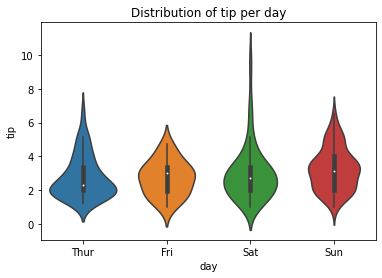

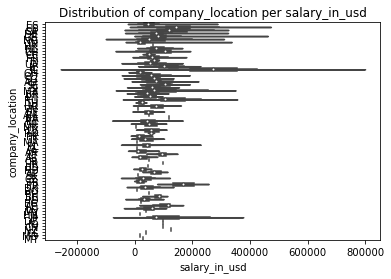

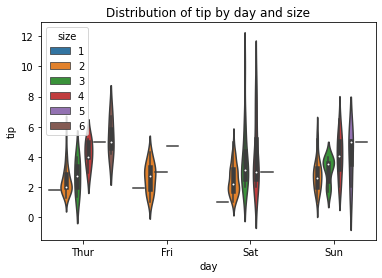

<AxesSubplot:title={'center':'Distribution of tip by day and size'}, xlabel='day', ylabel='tip'>

In [245]:
# 应用举例    
tips = sns.load_dataset("tips")
tips.head()
LD_plot_violin(tips,'day','tip')
LD_plot_violin(train_data, 'salary_in_usd','company_location')
LD_plot_violin(tips,'day','tip','size')


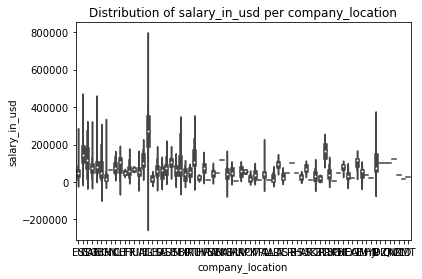

<AxesSubplot:title={'center':'Distribution of salary_in_usd per company_location'}, xlabel='company_location', ylabel='salary_in_usd'>

In [95]:
plot_violin(train_data, 'company_location','salary_in_usd')

In [222]:
tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

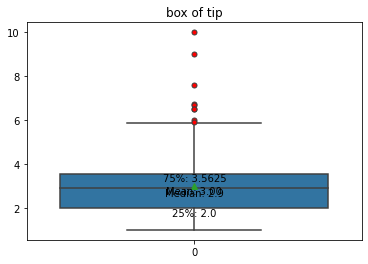

In [246]:
def duanli_plqotbox(data,target):
    # outliers={}
    for item in target:
        ax = sns.boxplot(data=data[item],showmeans=True,flierprops = {'marker':'o','markerfacecolor':'red','color':'black'})
        ax.set_title(f"box of {item}")
        temp=data[item].describe()
        mean=temp['mean']
        median=temp['50%']
        q1=temp['25%']
        q3=temp['75%']
        ax.text(0, median, f'Median: {median}', ha='center', va='top')
        ax.text(0, mean, f'Mean: {mean:.2f}', ha='center', va='top')
        ax.text(0, q1, f'25%: {q1}', ha='center', va='top')
        ax.text(0, q3, f'75%: {q3}', ha='center', va='top')

duanli_plqotbox(tips,['tip'])


## 这是一个牛逼闪闪的自动识别错误值的方法，只需要传入数据，和数据介绍

In [25]:
def Duanli_Cleaning_Data(data,Data_Description):    
    messages=[{'role':"system",'content':f"""you are a professional Data scientist,not a chat bot, only provide the pure answer.\
        any of your responses have to base on the dataset delimited by <> and the introduce delimited by briple backticks.\
        dataset:<{data}>\
        introduce:'''{Data_Description}''' \
              """}]
    inp1=f"""
            your task is to find what is the valid numeric value range of each column in the dataset,\
            make sure your answer is only based on your understanding of the ture meaning of each column, the common sense and your conservative estimation,\
            when you make decision please ignore the influence of the actual data in it.\
            format your responses as a JSON object with the following format:\
            ex:"range": "[1,10]".make sure only output the JSON,without any other characters.\
            if there are some column is not numeric value, just responde "N/A" for those column.
    """
    import openai
    key=''
    openai.api_key=key
    def chat2(inp,role='user'):
        messages.append({'role':role,'content':inp})
        response=openai.ChatCompletion.create(
            model='gpt-3.5-turbo',
            messages=messages,
            temperature=0)
        reply_content=response.choices[0].message.content
        messages.append({'role':'assistant','content':reply_content})
        return reply_content
    a=chat2(inp1)
    return a

In [26]:
# 使用案例
data = {
    'month_of_year': [9,2,1,4,5,3,7,8,60],
    'day_of_month': [9,2,1,4,5,3,7,8,60],
    'day_of_week': [9,2,1,4,5,3,7,8,60],
    'age': [9,2,1,4,5,3,7,8,60],
    'height': [9,2,1,4,5,3,7,8,60],
    'gender': [1,2,1,4,5,3,7,8,60],
    'year': [1,2,1,4,5,3,7,8,60],
    'name':['dd','dda','ddd','as','sad','qqq','ere','er','ea'],
    'judge':['Y','Y','N','N','N','Y','N','E','Y'],
    'salary':[1,2,1,4,5,3,7,8,60],
    'company_size':[1,2,1,4,5,3,7,8,60],
    'company_location':['dd','dda','ddd','as','sad','qqq','ere','er','ea']
    
    
}
df = pd.DataFrame(data)
introduce1=f"""
    - this Dataset contains 1 columns, each are:\
    - month_of_year:This column refers to the month of the year.\
    - day_of_month:This column refers to the day of the month.\
    - day_of_week:This column refers to the day of the week.\
    - age:This column refers to the age of a human.\
    - height:This column refers to the height of a human.\
    - gender:This column refers to the gender of a human, only can be 0 means male,1 means female.\
    - year:This column refers to the year of a this data was produced.\
    - name:This column refers to the name of a human.\
    - judge:This column refers to the judge of a human,only can be Y means yes, N means no.\
    - salary: the annual salary of one who work in the data science related field.\
    - company_location: The country of the employer's main office or contracting branch\
    - company_size: The median number of people that worked for the company during the year\
    """
b=Duanli_Cleaning_Data(df,introduce1)

In [27]:
print(b)

{
    "month_of_year": "[1, 12]",
    "day_of_month": "[1, 31]",
    "day_of_week": "[1, 7]",
    "age": "[0, 120]",
    "height": "[0, 300]",
    "gender": "[0, 1]",
    "year": "[1900, 2100]",
    "name": "N/A",
    "judge": "N/A",
    "salary": "[0, 1000000]",
    "company_location": "N/A",
    "company_size": "[1, 1000000]"
}


In [48]:
import openai
key=''
openai.api_key=key

In [111]:
introduce=f"""
- Data Science Job Salaries Dataset contains 11 columns, each are:\
- work_year: The year the salary was paid.\
- experience_level: The experience level in the job during the year\
- employment_type: The type of employment for the role\
- job_title: The role worked in during the year.\
- salary: The total gross salary amount paid.\
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.\
- salary_in_usd: The salary in USD\
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.\
- remote_ratio: The overall amount of work done remotely\
- company_location: The country of the employer's main office or contracting branch\
- company_size: The median number of people that worked for the company during the year\
"""
messages=[{'role':"system",'content':f"""you are a professional Data scientist.\
    any of your responses have to base on the dataset delimited by <> and the introduce delimited by briple backticks.\
    dataset:<{train_data}>\
    introduce:'''{introduce}''' \
          """}]

In [72]:
def chat2(inp,role='user'):
    messages.append({'role':role,'content':inp})
    response=openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=messages,
        temperature=0)
    reply_content=response.choices[0].message.content
    messages.append({'role':'assistant','content':reply_content})
    return reply_content

In [51]:
train_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [481]:
inp1=f"""
    you need to wrok on the dataset delimited by <>,the introduce delimited by the briple backticks just for you to\
    understand the dataset better,\
    what is the best way to do visualization for the column 'job_title'?.\
    dataset:<{train_data}>\
    introduce:'''{introduce}'''\
"""

In [482]:
a=chat2(inp1)

In [483]:
print(a)

The best way to visualize the 'job_title' column depends on the specific question you are trying to answer. Here are some possible visualization options:

1. Bar chart: A bar chart can be used to show the number of occurrences of each job title in the dataset. This can be useful for comparing the popularity of different job titles.

2. Word cloud: A word cloud can be used to show the frequency of different job titles in a visually appealing way. This can be useful for highlighting the most common job titles in the dataset.

3. Stacked bar chart: A stacked bar chart can be used to show the distribution of different job titles across different categories, such as experience level or employment type. This can be useful for identifying patterns in the data.

Here is the code to create a bar chart of the 'job_title' column:

```
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('<path_to_dataset>', delimiter=',')

# Count the number of occurrences of e

In [24]:
print(a)

Here is a more detailed strategy for data cleaning on the given dataset:

1. Check for missing values in the dataset and handle them appropriately. For example, if there are missing values in the "Sales" column, we can either remove those rows or impute the missing values with the mean or median of the column. If there are missing values in the "StateHoliday" column, we can impute them with the mode of the column.

2. Check for outliers in the dataset and handle them appropriately. For example, if there are outliers in the "Sales" column, we can either remove those rows or replace them with the mean or median of the column.

3. Check for duplicates in the dataset and remove them if necessary. We can use the "drop_duplicates" method to remove any duplicate rows.

4. Check for inconsistent data types in the columns and convert them to the appropriate data type. For example, we can convert the "Date" column to a datetime data type using the "to_datetime" method.

5. Check for any irreleva